In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
#importing csv fiC:\Users\satvi\OneDrive\Desktop\baseballle
data=pd.read_excel(r'C:\Users\satvi\OneDrive\Desktop\flight_price_prediction.xlsx')
data.head()

,Unnamed: 0,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,0,Air Asia,12/11/2021,New Delhi,Mumbai,20:00,02:25\n+ 1 day,6h 25m,1 Stop,5953
1,1,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,06:45\n+ 1 day,9h 20m,1 Stop,5953
2,2,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,07:15\n+ 1 day,9h 50m,1 Stop,5953
3,3,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,06:45\n+ 1 day,10h 00m,1 Stop,5953
4,4,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,07:15\n+ 1 day,10h 30m,1 Stop,5953


In [3]:
#checking for the shape of the dataset
data.shape

(3435, 10)

In the dataset there are 3435 entries and 10 attributes

In [4]:
#checking for the null values
data.isnull().sum()

Unnamed: 0         0
airline_name       0
date_of_journey    0
Source             0
Destination        0
depature_time      0
arrival_time       0
duration           0
total_stops        0
Price              0
dtype: int64

There are no null values in the dataset

In [5]:
#checking for dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435 entries, 0 to 3434
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3435 non-null   int64 
 1   airline_name     3435 non-null   object
 2   date_of_journey  3435 non-null   object
 3   Source           3435 non-null   object
 4   Destination      3435 non-null   object
 5   depature_time    3435 non-null   object
 6   arrival_time     3435 non-null   object
 7   duration         3435 non-null   object
 8   total_stops      3435 non-null   object
 9   Price            3435 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 268.5+ KB


Other than the price all the other attributes are object type and price is integer type

In [6]:
#checking for stats
data.describe()

,Unnamed: 0,Price
count,3435.000000,3435.000000
mean,1717.000000,7935.366812
std,991.743414,3779.496341
min,0.000000,1604.000000
25%,858.500000,5179.000000
50%,1717.000000,7424.000000
75%,2575.500000,10248.000000
max,3434.000000,36530.000000


The average Price of flight is 7935, and max price is 36530.

In [7]:
#Dropping the unwanted column
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [8]:
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,Air Asia,12/11/2021,New Delhi,Mumbai,20:00,02:25\n+ 1 day,6h 25m,1 Stop,5953
1,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,06:45\n+ 1 day,9h 20m,1 Stop,5953
2,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,07:15\n+ 1 day,9h 50m,1 Stop,5953
3,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,06:45\n+ 1 day,10h 00m,1 Stop,5953
4,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,07:15\n+ 1 day,10h 30m,1 Stop,5953


In [9]:
#spitting the arriavl column which has string data
data['arrival_time']=data['arrival_time'].str.split(expand=True)
data['arrival_time']

0       02:25
1       06:45
2       07:15
3       06:45
4       07:15
        ...  
3430    10:50
3431    10:50
3432    10:50
3433    10:50
3434    17:05
Name: arrival_time, Length: 3435, dtype: object

In [10]:
#checking the dataset
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price
0,Air Asia,12/11/2021,New Delhi,Mumbai,20:00,02:25,6h 25m,1 Stop,5953
1,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,06:45,9h 20m,1 Stop,5953
2,Air Asia,12/11/2021,New Delhi,Mumbai,21:25,07:15,9h 50m,1 Stop,5953
3,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,06:45,10h 00m,1 Stop,5953
4,Air Asia,12/11/2021,New Delhi,Mumbai,20:45,07:15,10h 30m,1 Stop,5953


In [11]:
# Checking for value counts

In [12]:
data['airline_name'].value_counts()

Vistara              939
Multiple Airlines    423
Air India            399
IndiGo               324
GO FIRST             312
AirIndia             261
Indigo               250
AirAsia India        176
SpiceJet             132
AirAsia              112
Go First              70
Air Asia              28
Star Air               7
TruJet                 2
Name: airline_name, dtype: int64

In [13]:
data['Source'].value_counts()

Delhi            891
Bangalore        680
Hyderabad        564
New Delhi        492
Pune             282
Cochin           259
Kolkata          256
HYD Hyderabad      5
PNQ Pune           2
DEL Delhi          2
BLR Bangalore      1
COK Cochin         1
Name: Source, dtype: int64

In [14]:
data['Destination'].value_counts()

Mumbai           1624
Bangalore        1326
Cochin            282
Chennai           192
BOM Mumbai          5
BLR Bangalore       4
COK Cochin          2
Name: Destination, dtype: int64

In [15]:
data['total_stops'].value_counts()

1-stop        1083
 1 Stop(s)    1005
 2 Stop(s)     348
1 Stop         342
Non-Stop       210
non-stop       188
Non Stop       136
2+-stop         95
2 Stop(s)       13
 3 Stop(s)      12
 4 Stop(s)       2
3 Stop(s)        1
Name: total_stops, dtype: int64

### Feature Engineering

In [16]:
#replacing the airline names with the repeated data
data['airline_name']=data['airline_name'].replace(['Indigo','Air India','Go First','AirAsia India','Air Asia'],['IndiGo','AirIndia','GO FIRST','AirAsia','AirAsia'])
#replacing the source with the repeated data
data['Source']=data['Source'].replace(['New Delhi','BLR Bangalore','DEL Delhi','HYD Hyderabad','PNQ Pune','COK Cochin'],['Delhi','Bangalore','Delhi','Hyderabad','Pune','Cochin'])
#replacing the destination with the repeated data
data['Destination']=data['Destination'].replace(['BOM Mumbai','BLR Bangalore','COK Cochin'],['Mumbai','Bangalore','cochin'])

In [17]:
#replacing the stops with count
data['total_stops']=data['total_stops'].replace(['1-stop',' 1 Stop(s)','1 Stop'],1)
data['total_stops']=data['total_stops'].replace([' 2 Stop(s)','2+-stop','2 Stop(s)'],2)
data['total_stops']=data['total_stops'].replace([' 3 Stop(s)','3 Stop(s)'],3)
data['total_stops']=data['total_stops'].replace([' 4 Stop(s)'],4)
data['total_stops']=data['total_stops'].replace(['Non-Stop','non-stop','Non Stop'],0)

In [18]:
data['total_stops'].value_counts()

1    2430
0     534
2     456
3      13
4       2
Name: total_stops, dtype: int64

In [19]:
#converting the depature_Time into hours,minutes and seconds.
data['Dep_hour']=pd.to_datetime(data['depature_time']).dt.hour
data['Dep_minute']=pd.to_datetime(data['depature_time']).dt.minute

In [20]:
#converting the arrival_Time into hours,minutes and seconds.
data['arr_hour']=pd.to_datetime(data['arrival_time']).dt.hour
data['arr_minute']=pd.to_datetime(data['arrival_time']).dt.minute


In [21]:
#converting the duration column
duration=list(data['duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        else:
            duration[i]="0h "+ duration[i]
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))        
        

In [22]:
#Equating the hours and minutes of duration column
data['duration_hours']=duration_hours
data['duration_mins']=duration_mins

In [24]:
#Converting the date of journey columns into day month and year 
#Converting the date of journey columns into day month and year 
data['date_of_Journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.day
data['month_of_journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.month
data['year_of_journey']=pd.to_datetime(data['date_of_journey'],format="%d/%m/%Y").dt.year


In [25]:
data.head()

,airline_name,date_of_journey,Source,Destination,depature_time,arrival_time,duration,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,year_of_journey
0,AirAsia,12/11/2021,Delhi,Mumbai,20:00,02:25,6h 25m,1,5953,20,0,2,25,6,25,12,11,2021
1,AirAsia,12/11/2021,Delhi,Mumbai,21:25,06:45,9h 20m,1,5953,21,25,6,45,9,20,12,11,2021
2,AirAsia,12/11/2021,Delhi,Mumbai,21:25,07:15,9h 50m,1,5953,21,25,7,15,9,50,12,11,2021
3,AirAsia,12/11/2021,Delhi,Mumbai,20:45,06:45,10h 00m,1,5953,20,45,6,45,10,0,12,11,2021
4,AirAsia,12/11/2021,Delhi,Mumbai,20:45,07:15,10h 30m,1,5953,20,45,7,15,10,30,12,11,2021


In [26]:
#Dropping the columns which are converted
data.drop(columns=['date_of_journey','year_of_journey','depature_time','arrival_time','duration'],axis=1,inplace=True)

In [27]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11
1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11
2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11
3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11
4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11


### Visualisation

<Figure size 7200x3600 with 0 Axes>

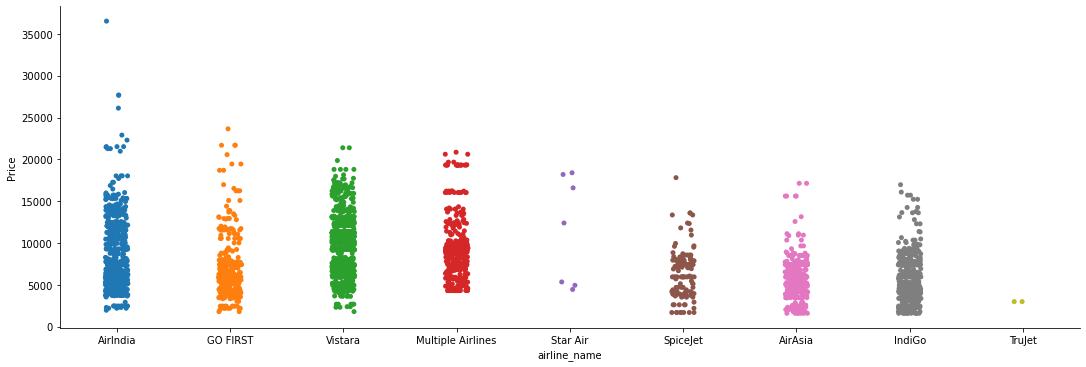

In [28]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(y='Price',x='airline_name',data=data.sort_values('Price',ascending=False),height=5,aspect=3)
plt.show()

Comapred to all the other airlines Air india fare is more.

<Figure size 72000x36000 with 0 Axes>

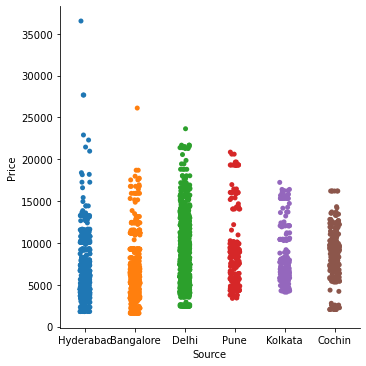

In [29]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(1000,500))
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False))
plt.show()

Choosing a flight from hyderabad has more fare.

<Figure size 72000x36000 with 0 Axes>

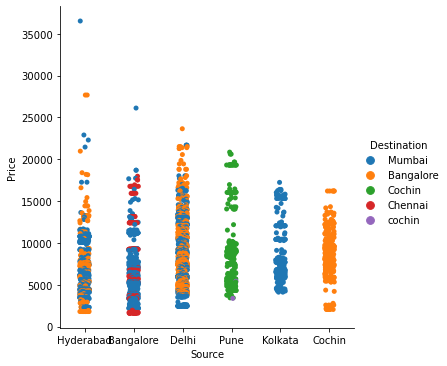

In [30]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(1000,500))
sns.catplot(x='Source',y='Price',hue='Destination',data=data.sort_values('Price',ascending=False))
plt.show()

flight prices are high, when travelling from hyderabad to mumbai. 

<Figure size 7200x3600 with 0 Axes>

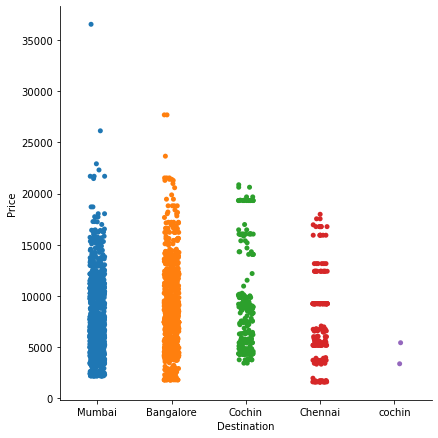

In [31]:
#Lets plot count plot on categorical column and check the data
plt.figure(figsize=(100,50))
sns.catplot(x='Destination',y='Price',data=data.sort_values('Price',ascending=False),height=6)
plt.show()

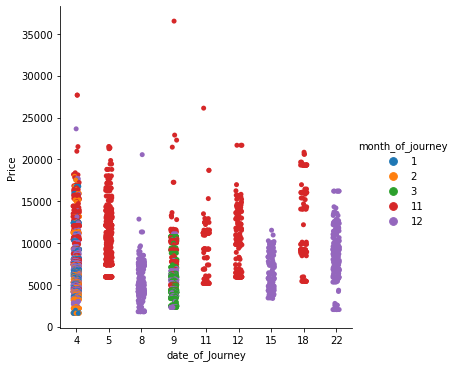

In [32]:
sns.catplot(x='date_of_Journey',y='Price',hue='month_of_journey',data=data.sort_values('Price',ascending=False))

Travelling on 9th of November the flight fares are high because the flight fares will be high, as the date of journey is near.

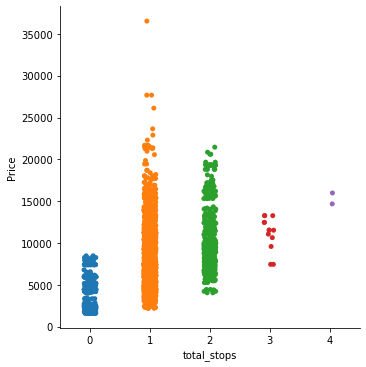

In [33]:
sns.catplot(x='total_stops',y='Price',data=data.sort_values('Price',ascending=False))

Choosing one stop flights results in high fare.

<AxesSubplot:xlabel='Dep_hour', ylabel='Density'>

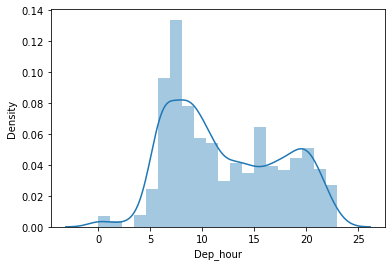

In [34]:
#Dist Plot
sns.distplot(data['Dep_hour'])

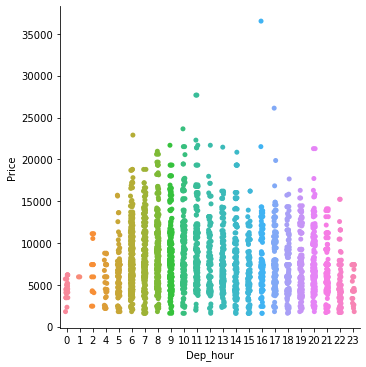

In [40]:
sns.catplot(x='Dep_hour',y='Price',data=data.sort_values('Price',ascending=False))

### HistoGram plots

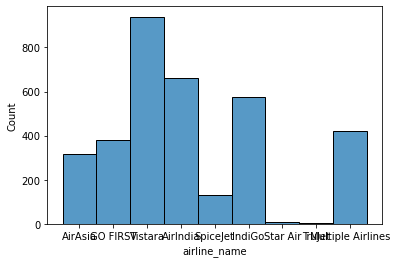

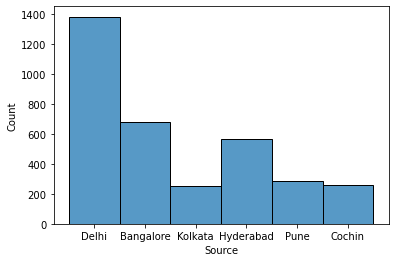

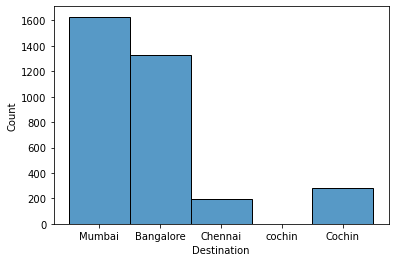

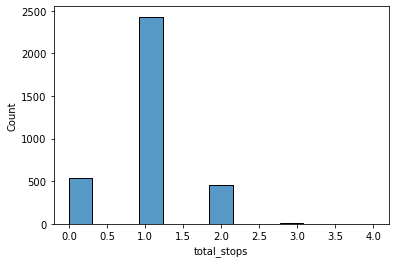

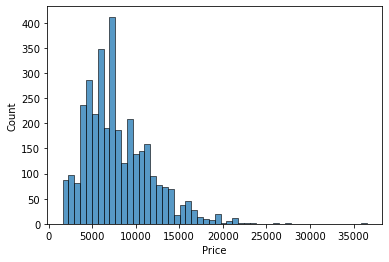

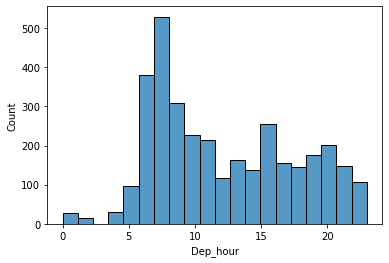

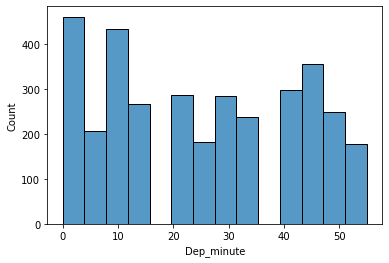

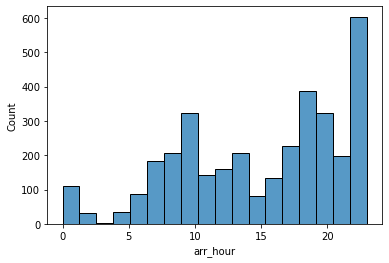

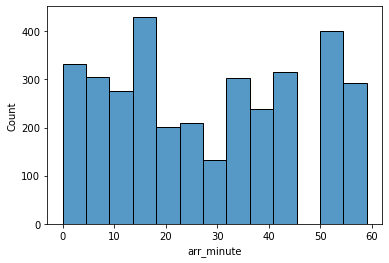

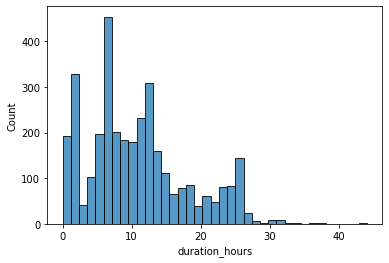

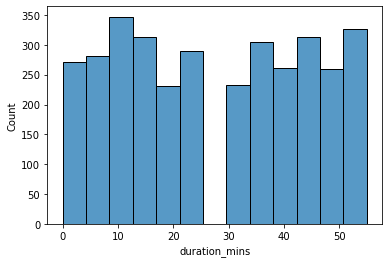

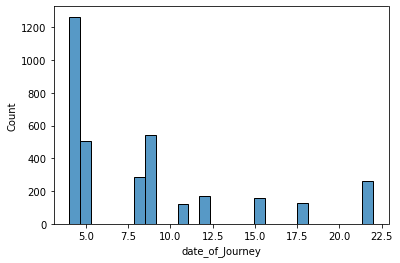

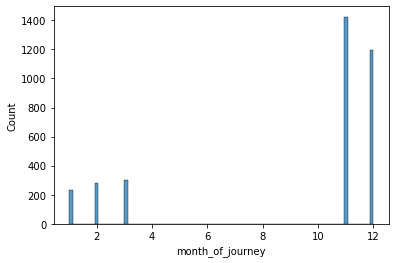

In [35]:
for i in data.columns:

    sns.histplot(data[i])
    plt.show()

In [36]:
#checking for categorical columns
cat_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        cat_col.append(i)
cat_col

['airline_name', 'Source', 'Destination']

In [37]:
#checking for numerical columns
num_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        num_col.append(i)
num_col

['total_stops',
 'Price',
 'Dep_hour',
 'Dep_minute',
 'arr_hour',
 'arr_minute',
 'duration_hours',
 'duration_mins',
 'date_of_Journey',
 'month_of_journey']

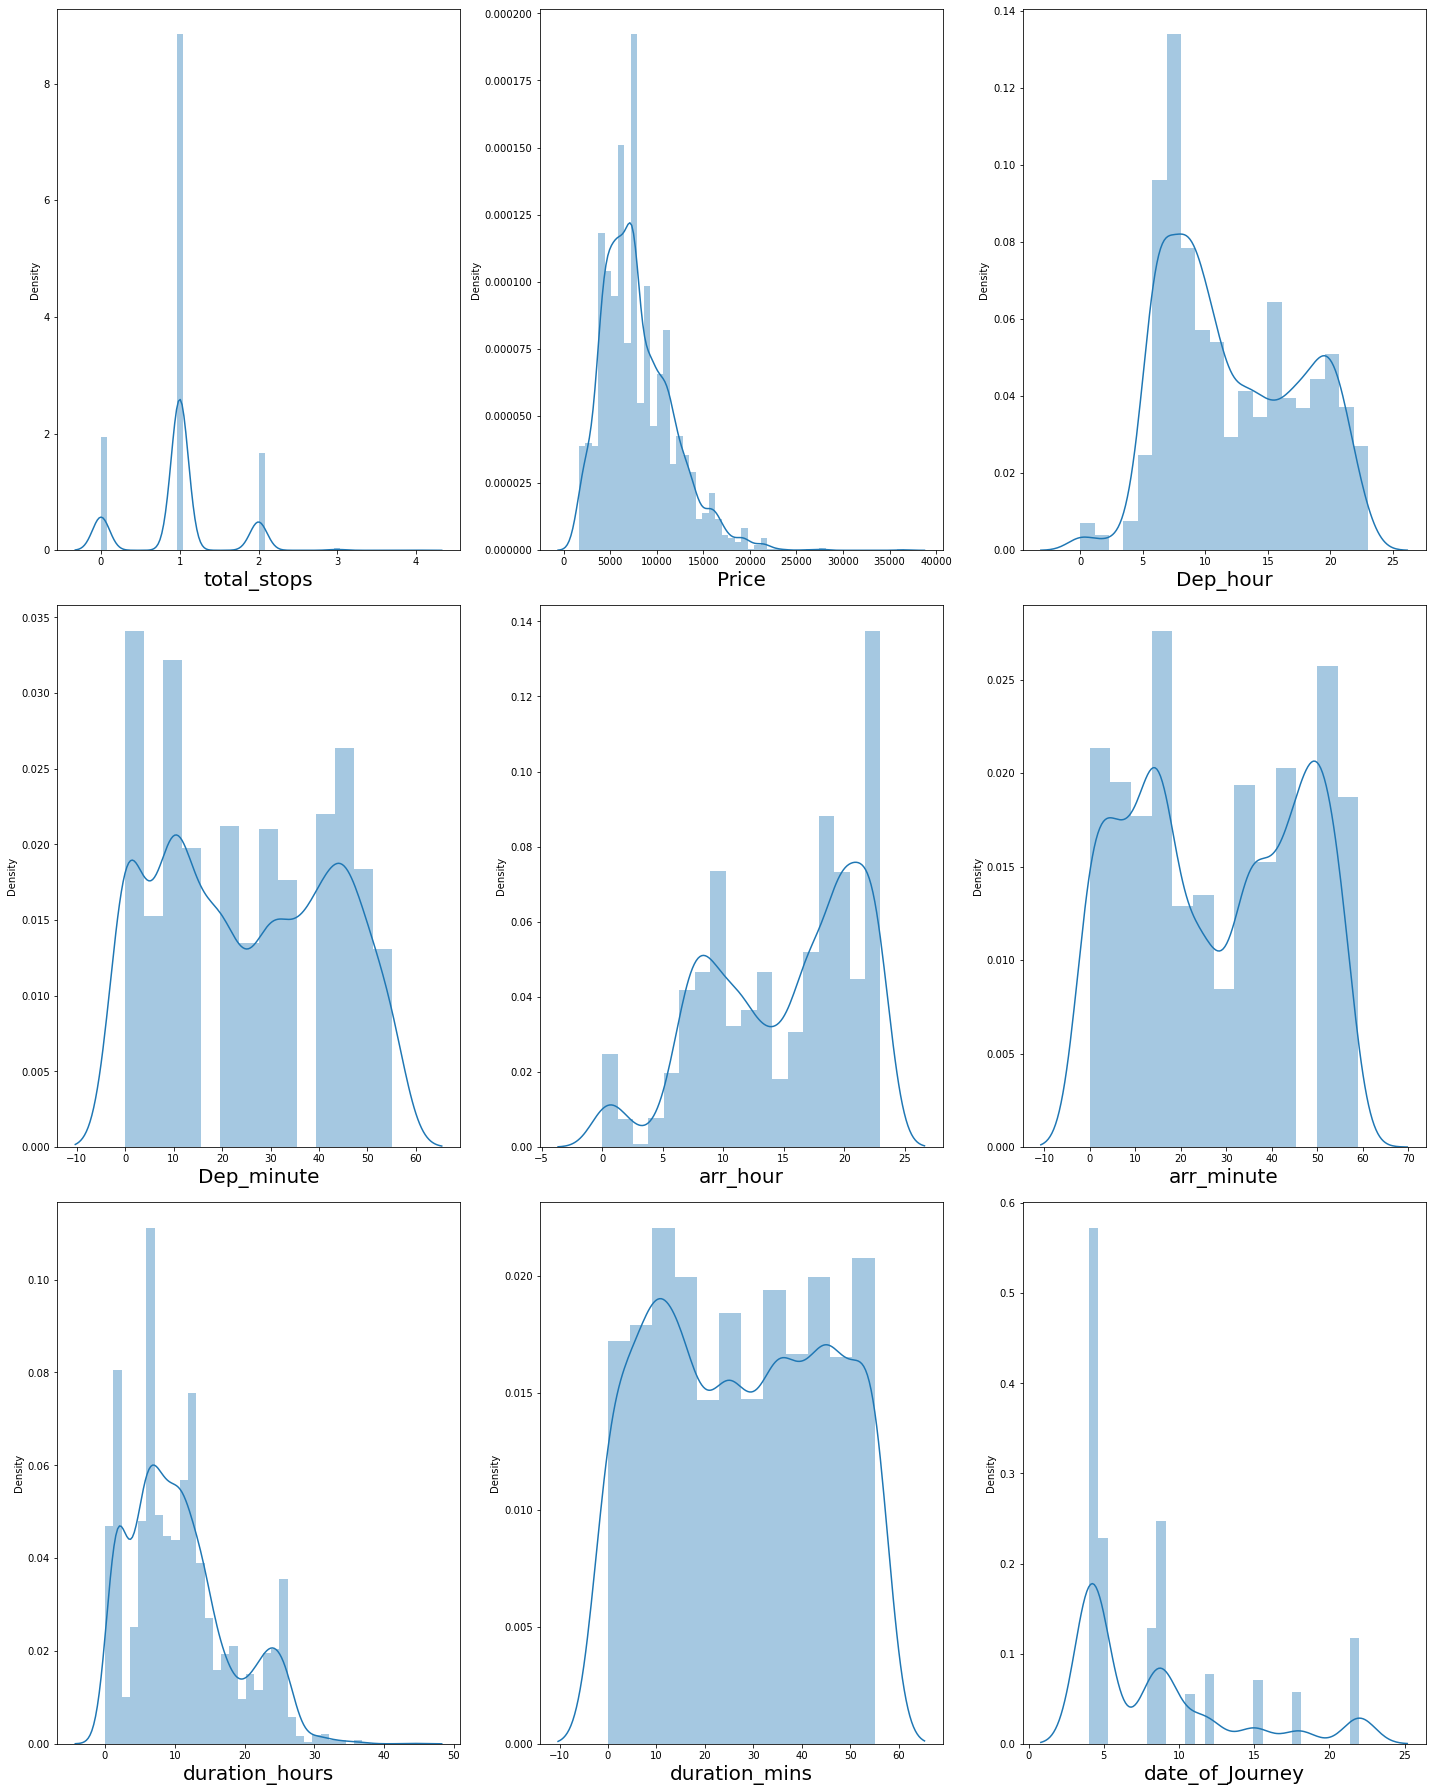

In [38]:
#Now lets plot dist plot and visualise how the data is distributed in each column
#lets plot the distribution plot to check the distribution of our data
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


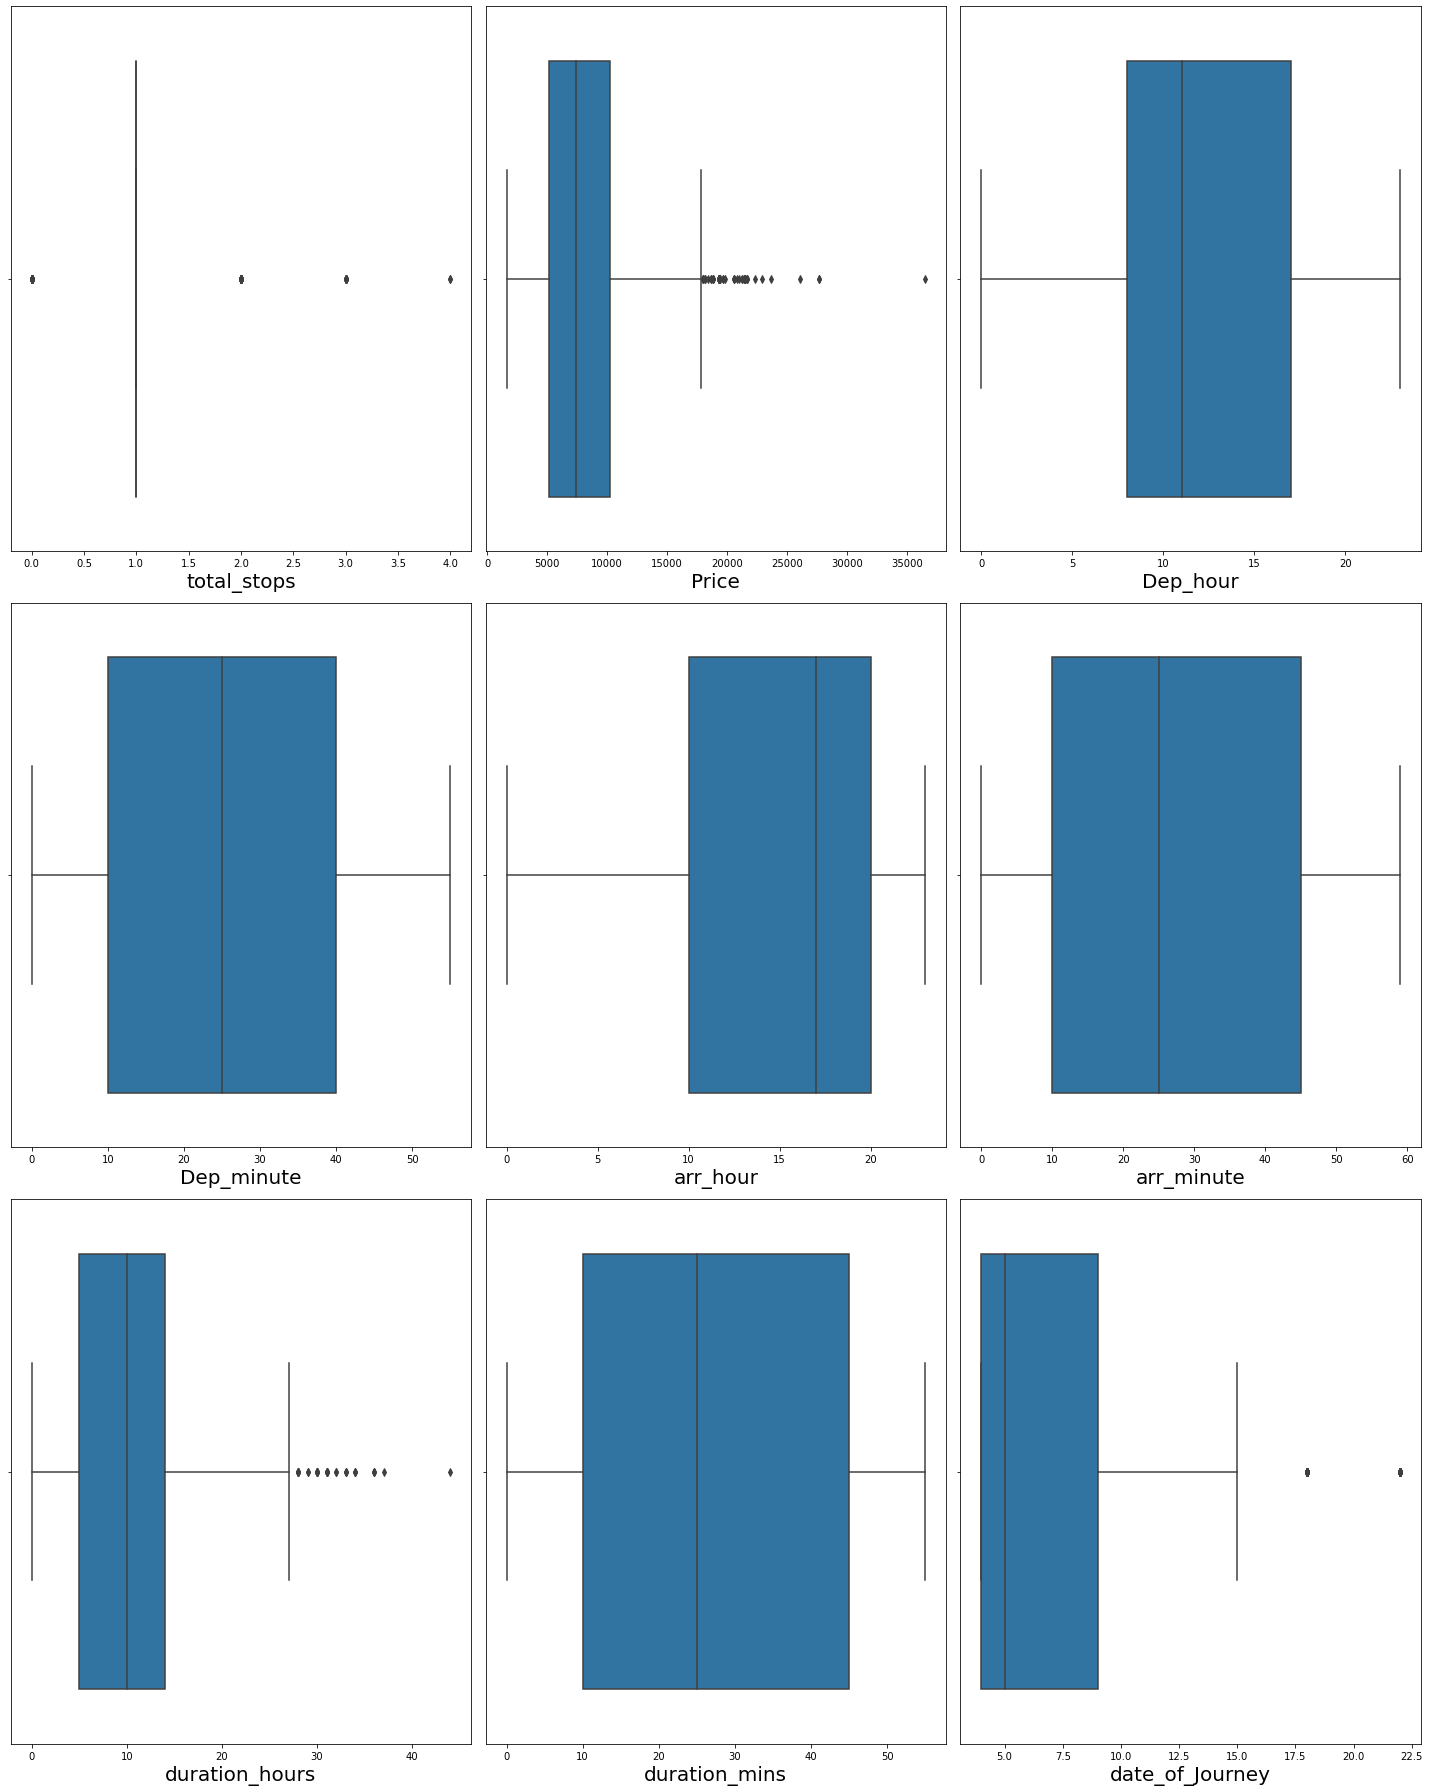

In [39]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


There is some skewness present in the columns

### Z_Score

In [40]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove our outiers using z_score
z=np.abs(stats.zscore(data[num_col]))#abs=absolute numberprint(z)
print(z)

[[0.02411392 0.52458192 1.46527533 ... 0.14654874 0.68470835 0.43859878]
 [0.02411392 0.52458192 1.65241174 ... 0.43221151 0.68470835 0.43859878]
 [0.02411392 0.52458192 1.65241174 ... 1.2817651  0.68470835 0.43859878]
 ...
 [1.82479445 2.18913762 0.59322513 ... 0.71787428 2.5359269  0.68659661]
 [1.82479445 2.18913762 0.59322513 ... 0.71787428 2.5359269  0.68659661]
 [1.82479445 2.18913762 0.5295933  ... 1.57486259 2.5359269  0.68659661]]


In [41]:

print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [  80  167  168  169  488  489  490  491  670  671  672  673  674  825
  832  836  839  848 1043 1316 1702 1709 1715 1750 1751 1799 1919 1921
 1936 1937 1938 2035 2036 2163 2164 2169 2172 2181 2345 2764 2768 2769
 2770 2771 3046 3134 3139 3154 3155 3156 3157 3158 3159 3160 3161 3162
 3163 3164 3165 3166 3167 3168 3169 3170 3171 3172 3173 3174 3378 3384]


In [42]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data=data.drop(data.index[index])

In [43]:
data.shape

(3365, 13)

In [44]:
#Checking for the % of dataloss
loss_percent=(3435-3365)/1470*100
loss_percent


4.761904761904762

In [45]:
data.reset_index()

,index,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11
1,1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11
2,2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11
3,3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11
4,4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,3430,Multiple Airlines,Cochin,Bangalore,2,16208,13,45,10,50,21,5,22,12
3361,3431,Multiple Airlines,Cochin,Bangalore,2,16208,13,45,10,50,21,5,22,12
3362,3432,Multiple Airlines,Cochin,Bangalore,2,16208,9,35,10,50,25,15,22,12
3363,3433,Multiple Airlines,Cochin,Bangalore,2,16208,9,35,10,50,25,15,22,12


In [46]:
# As Airline is Nominal Categorical data we will use OneHotEncoding to convert the data

Airlines = pd.get_dummies(data['airline_name'],drop_first=True)

Airlines.head()

,AirIndia,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,TruJet,Vistara
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [47]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = pd.get_dummies(data['Source'], drop_first= True)
Source.head()

,Cochin,Delhi,Hyderabad,Kolkata,Pune
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [48]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(data['Destination'], drop_first= True)
Destination.head()

,Chennai,Cochin,Mumbai,cochin
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [49]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey
0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11
1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11
2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11
3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11
4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11


In [50]:
data=pd.concat([data,Airlines,Source,Destination],axis=1)

In [51]:
data.head()

,airline_name,Source,Destination,total_stops,Price,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,AirIndia,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,TruJet,Vistara,Cochin,Delhi,Hyderabad,Kolkata,Pune,Chennai,Cochin,Mumbai,cochin
0,AirAsia,Delhi,Mumbai,1,5953,20,0,2,25,6,25,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,AirAsia,Delhi,Mumbai,1,5953,21,25,6,45,9,20,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,AirAsia,Delhi,Mumbai,1,5953,21,25,7,15,9,50,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,AirAsia,Delhi,Mumbai,1,5953,20,45,6,45,10,0,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,AirAsia,Delhi,Mumbai,1,5953,20,45,7,15,10,30,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [52]:
#dropping the columns which are encoded
data.drop(columns=['airline_name','Source','Destination'],axis=1,inplace=True)

### Heat Map

<AxesSubplot:>

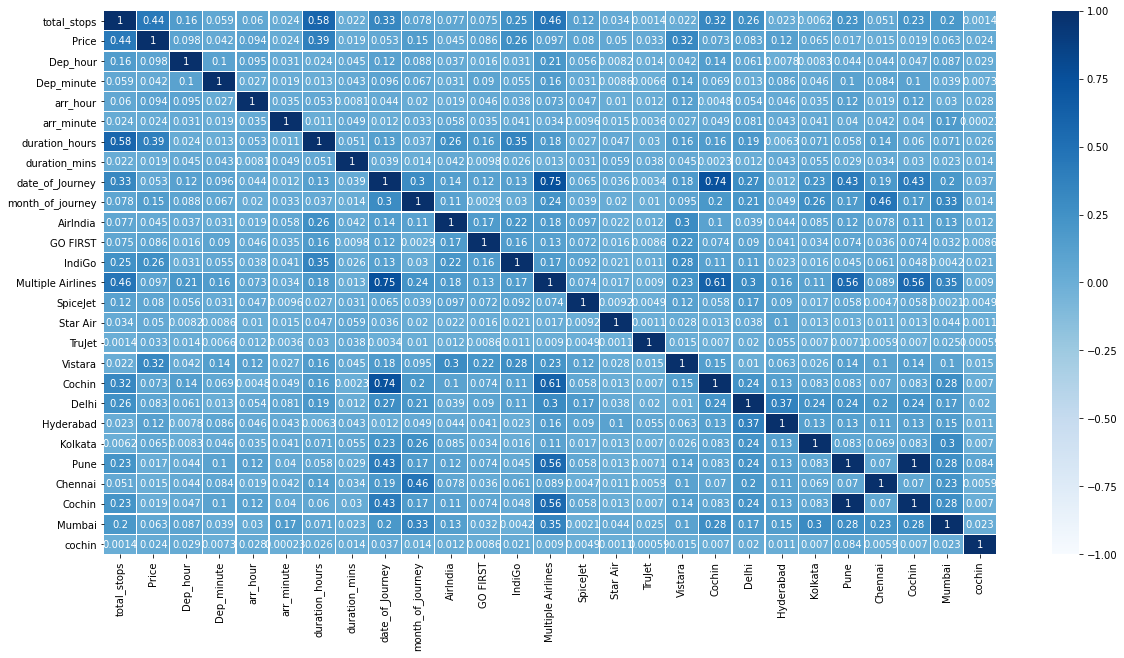

In [53]:
#checking for collinearity
data_corr=data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,cmap='Blues',vmin=-1,vmax=1,annot=True,fmt='.2g',linewidth=0.1,center=0)

1.From heat map the light coloured are less correlated and dark coloured are highly correlated.

2.Even there are some columns which are highly correlated with each other which means there exists multi collinearity problem with pune and cochin columns.

In [54]:
#seperating label and features in x and y variables
x=data.drop(columns=['Price'],axis=1)
y=data['Price']

In [55]:
x.head()

,total_stops,Dep_hour,Dep_minute,arr_hour,arr_minute,duration_hours,duration_mins,date_of_Journey,month_of_journey,AirIndia,GO FIRST,IndiGo,Multiple Airlines,SpiceJet,Star Air,TruJet,Vistara,Cochin,Delhi,Hyderabad,Kolkata,Pune,Chennai,Cochin,Mumbai,cochin
0,1,20,0,2,25,6,25,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,21,25,6,45,9,20,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,21,25,7,15,9,50,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,20,45,6,45,10,0,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,20,45,7,15,10,30,12,11,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [56]:
#checking for the top 30 important features which contribute in our label prediction
#importing the ExtraTreesRegressor for selecting features
from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()
feature_selection.fit(x,y)

ExtraTreesRegressor()

In [57]:
print(feature_selection.feature_importances_)

[2.03166553e-01 3.03491278e-02 3.56515640e-02 3.46802146e-02
 3.57389692e-02 7.13594910e-02 2.06466050e-02 3.83565922e-02
 2.57707833e-01 4.98854467e-02 6.78703445e-03 1.39111122e-02
 4.63560607e-03 3.72995377e-03 6.41933363e-03 3.46775309e-05
 9.70477192e-02 6.15676338e-03 2.46739045e-02 1.21906657e-02
 1.40614487e-02 3.45068493e-03 3.35562953e-03 3.34441554e-03
 2.26514876e-02 7.16788899e-06]


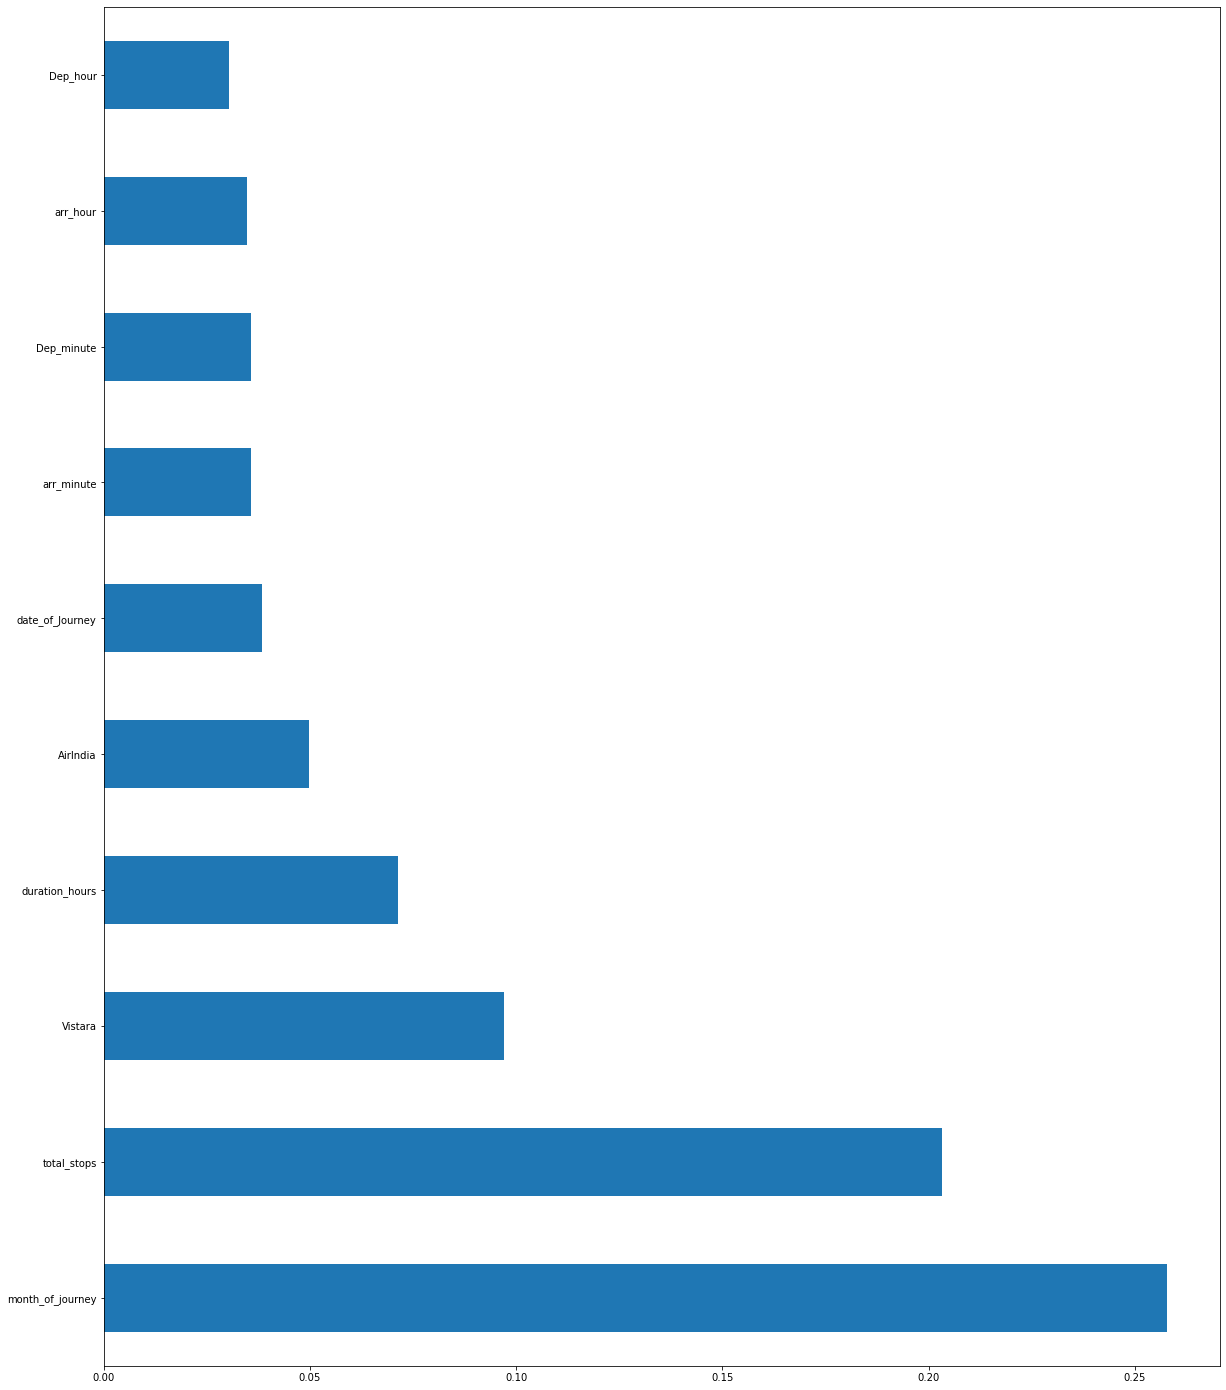

In [58]:
plt.figure(figsize=(20,25))
feature_importances=pd.Series(feature_selection.feature_importances_,index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

Top three best features for our label prediction are moth of journey,total stops and vistara flight among that, month of journey is the top best feature who contributes more for our flight price prediction.

In [59]:
#Dropping the columns which are least contributing
x.drop(columns=['TruJet','Cochin'],axis=1,inplace=True)

In [60]:
#Treating of skewness using Powertransform function.
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x   

array([[ 0.05131225,  1.38103208, -1.73076685, ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132854,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132854,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       ...,
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659,  0.58141002, -1.13440282, ..., -0.24188626,
        -0.96008281, -0.02438662]])

In [61]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.05131225,  1.38103208, -1.73076685, ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132854,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       [ 0.05131225,  1.53132854,  0.1504618 , ..., -0.24188626,
         1.04157682, -0.02438662],
       ...,
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659, -0.52810089,  0.62541151, ..., -0.24188626,
        -0.96008281, -0.02438662],
       [ 1.95070659,  0.58141002, -1.13440282, ..., -0.24188626,
        -0.96008281, -0.02438662]])

In [62]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [63]:
#importing all the required libraries to build our model

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics

### Linear Regression

In [64]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


Training_score 0.4322068420990143
Testing_score 0.32935514181798553
Mean squared error 8020381.123270806
Mean Absolute error 2154.247951342363
RMSE 2832.027740554602


### KNeighbors Regressor

In [65]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))


Training_score 0.7386362505571653
Testing_score 0.5451642732949227
Mean squared error 5439474.905605701
Mean Absolute error 2154.247951342363
RMSE 2332.268189039524


### Decision Tree Regressor

In [66]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))


Training_score 0.9980344913793752
Testing_score 0.680684385004333
Mean squared error 3818761.74793811
Mean Absolute error 924.5441409342835
RMSE 1954.1652304598274


### Random Forest Regressor

In [67]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Training_score 0.9756567250405627
Testing_score 0.8282776094239526
Mean squared error 2053663.7282996518
Mean Absolute error 845.2678392257319
RMSE 1433.0609646137361


### Support vector Regressor

In [68]:
svm=SVR()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
print('Training_score',svm.score(x_train,y_train))
print('Testing_score',svm.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_svm))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_svm))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_svm)))


Training_score 0.0031618443119636463
Testing_score 0.006268617350738692
Mean squared error 11884239.960636262
Mean Absolute error 2706.4497150038724
RMSE 3447.3526017273402


### Ada Boost Regressor

In [69]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))


Training_score 0.49465611573372625
Testing_score 0.44286534878975736
Mean squared error 6662888.986877095
RMSE 2581.257249263834


### Extreme Gradient Boost Regressor

In [70]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print('training score:',xgb.score(x_train,y_train))
print('testing score:',xgb.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))


training score: 0.9822705755388497
testing score: 0.8244357607271635
Mean squared error 2099609.1946523166
RMSE 1449.0028276895516


### Hyper parameter Tuning

In [71]:
#getting best parameters for Linear regression
#Using Grid Search CV for finding the best Parameters
parameters={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':np.arange(0,10)}
lr=LinearRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}


In [75]:
#Hyperparameter tuning using GridSearchCV for KneighborsRegressor to find best parameters.
parameters={ 'n_neighbors' :np.arange(1,10),'weights':['uniform','distance'],'algorithm':['kd_tree','brute']}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 6, 'weights': 'distance'}


In [76]:
#Hyperparameter tuning using GridSearchCV for DecisionTreeRegressor to find out best parameters.
parameters={ "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[10,20,30,40,50,60,70,80,90] }
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters,n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [77]:
#Hyperparameter tuning using GridSearchCV for RandomForestClassifier to find out best parameters.
parameters={ "max_depth":[1,3,5,7,9,11,12],"n_estimators": [10,20,30],"max_features": ["auto", "sqrt", "log2"],"min_samples_split": [2,4,8],"bootstrap":[True, False],"criterion":['mse','friedman_mse']} 
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 11, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}


In [78]:
#Hyperparameter tuning using GridSearchCV for Ada boost regressor to find out best parameters.
parameters={'base_estimator':['object',None],'n_estimators':[10,20,30],'learning_rate':[0.1,0.2,0.3,0.4],'loss':['linear', 'square', 'exponential']}
ab=AdaBoostRegressor()
clf=GridSearchCV(ab,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'base_estimator': None, 'learning_rate': 0.4, 'loss': 'exponential', 'n_estimators': 30}


In [79]:
#Hyperparameter tuning using GridSearchCV for xg boost regressor to find out best parameters.
parameters={'n_estimators':[10,20,30], 'max_depth':np.arange(5,25), 'eta':[0.1,0.2,0.3], 'subsample':np.arange(0,1), 'colsample_bytree':np.arange(0,1)}
xgb=XGBRegressor()
clf=GridSearchCV(xgb,parameters,n_jobs=-1)
clf.fit(x,y)
print(clf.best_params_)

{'colsample_bytree': 0, 'eta': 0.1, 'max_depth': 5, 'n_estimators': 10, 'subsample': 0}


### Tuning the models

In [72]:
#Linear REgression
lr=LinearRegression(copy_X= True, fit_intercept=True, n_jobs= 0, normalize=True)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Training_score',lr.score(x_train,y_train))
print('Testing_score',lr.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_lr))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_lr)))


Training_score 0.4322068420990143
Testing_score 0.3293551418179854
Mean squared error 8020381.123270809
Mean Absolute error 2154.247951342363
RMSE 2832.027740554603


In [73]:
#KNeighbors Regressor
knn=KNeighborsRegressor(algorithm='brute', n_neighbors=8, weights='distance')
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
print('Training_score',knn.score(x_train,y_train))
print('Testing_score',knn.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_knn))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_lr))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_knn)))


Training_score 0.9994389274999803
Testing_score 0.6274491006511721
Mean squared error 4455413.56821072
Mean Absolute error 2154.247951342363
RMSE 2110.785059690048


In [74]:
#DecisionTree Regressor
dt=DecisionTreeRegressor(max_depth= 5, max_features='auto',max_leaf_nodes=10,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Training_score',dt.score(x_train,y_train))
print('Testing_score',dt.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_dt))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_dt))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_dt)))


Training_score 0.5215322211998707
Testing_score 0.5258378113063147
Mean squared error 5670604.077807561
Mean Absolute error 1839.791582007007
RMSE 2381.3030209966055


In [85]:
#RandomForest Regressor
rf=RandomForestRegressor(bootstrap=True,criterion='mse', max_depth=15,max_features='auto',min_samples_split=2,n_estimators=20)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print('Training_score',rf.score(x_train,y_train))
print('Testing_score',rf.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_rf))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_rf))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

Training_score 0.9633200771596694
Testing_score 0.807372130863607
Mean squared error 2303676.687577172
Mean Absolute error 896.5647962119615
RMSE 1517.7867727639386


In [76]:
#Adaboost Regressor
ab=AdaBoostRegressor(base_estimator= None, learning_rate=0.4,loss='exponential',n_estimators=30)
ab.fit(x_train,y_train)
y_pred_ab=ab.predict(x_test)
print('Training_score',ab.score(x_train,y_train))
print('Testing_score',ab.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_ab))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_ab))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_ab)))


Training_score 0.5640206797595351
Testing_score 0.5472114716319263
Mean squared error 5414992.035577882
Mean Absolute error 1842.286173476121
RMSE 2327.013544347751


In [77]:
#ExtremeGradientboost Regressor
xgb=XGBRegressor(max_depth=30,n_estimators=20)
xgb.fit(x_train,y_train)
y_pred_xgb=xgb.predict(x_test)
print('training score:',xgb.score(x_train,y_train))
print('testing score:',xgb.score(x_test,y_test))
print('Mean squared error',mean_squared_error(y_test,y_pred_xgb))
print('Mean Absolute error',mean_absolute_error(y_test,y_pred_xgb))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))


training score: 0.9975736273317024
testing score: 0.8503241216571401
Mean squared error 1790004.9103846925
Mean Absolute error 769.7450432494247
RMSE 1337.9106511216257


In [78]:
#Creating the dataframe for all models
Model=[]
Model.append(('Linear Regression',lr))
Model.append(('KNeighbors Regressor',knn))
Model.append(('DecisionTreeRegressor',dt))
Model.append(('RandomForest Regressor',rf))
Model.append(('AdaBoostRegressor',ab))
Model.append(('Extreme Gradient Boost Regressor',xgb))

In [79]:
Models=[]
Score=[]
MSE=[]
RMSE=[]
MAE=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Model Score
    a=model.score(x_test,y_test)
    print('Model Score: ',a)
    Score.append(a*100)
    print('\n')
    
# MSE
    m=mean_squared_error(y_test,pred)
    print('MSE Score: ',m)
    MSE.append(m)
    print('\n') 
    
#MAE

    m=mean_absolute_error(y_test,pred)
    print('MAE: ',m)
    MAE.append(m)
    print('\n') 
    
# RMSE
    r=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE Score: ',r)
    RMSE.append(r)
    print('\n')


Linear Regression 

LinearRegression(n_jobs=0, normalize=True)


Model Score:  0.3293551418179854


MSE Score:  8020381.123270809


MAE:  2154.247951342363


RMSE Score:  2832.027740554603


KNeighbors Regressor 

KNeighborsRegressor(algorithm='brute', n_neighbors=8, weights='distance')


Model Score:  0.6274491006511721


MSE Score:  4455413.56821072


MAE:  1396.1268687506313


RMSE Score:  2110.785059690048


DecisionTreeRegressor 

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=10,
                      min_weight_fraction_leaf=0.1)


Model Score:  0.5258378113063147


MSE Score:  5670604.077807561


MAE:  1839.791582007007


RMSE Score:  2381.3030209966055


RandomForest Regressor 

RandomForestRegressor(max_depth=15, n_estimators=20)


Model Score:  0.8047855821248039


MSE Score:  2334609.761060137


MAE:  897.2150364110694


RMSE Score:  1527.9429835763299


AdaBoostRegressor 

AdaBoostRegressor(learning_rate=0.4, loss='exponential', n_estimators=30)


M

In [80]:
#Making DataFrame
pd.DataFrame({"Models":Models,"Model Score":Score,'Mean Squared Error':MSE,'Mean Absolute Error':MAE,'Root Mean Squared error':RMSE})

,Models,Model Score,Mean Squared Error,Mean Absolute Error,Root Mean Squared error
0,Linear Regression,32.935514,8.020381e+06,2154.247951,2832.027741
1,KNeighbors Regressor,62.744910,4.455414e+06,1396.126869,2110.785060
2,DecisionTreeRegressor,52.583781,5.670604e+06,1839.791582,2381.303021
3,RandomForest Regressor,80.478558,2.334610e+06,897.215036,1527.942984
4,AdaBoostRegressor,54.396152,5.453859e+06,1858.090346,2335.349843
5,Extreme Gradient Boost Regressor,85.032412,1.790005e+06,769.745043,1337.910651


In [86]:
#getting the 15 predicted values and comapring with the test values
print(y_pred_xgb[:15])
print(y_test.values[:15])

[ 6079.623   7106.494  18032.11    1607.7745  3502.0479  8250.6045
  5929.449   6767.873   6974.72    4447.8203  4974.1504  6085.163
  5554.102   6620.4775  4156.8906]
[ 7086  7281 15426  1606  3601  8475  5954  6962  7731  4977  4503  6745
  5934  7630  3671]


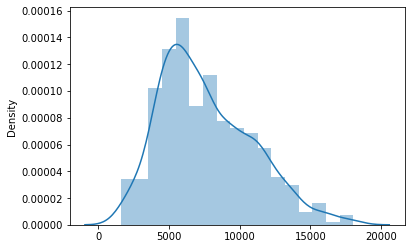

In [87]:
#Scatter plot for test data prediction
sns.distplot(y_pred_xgb)
plt.show()

The predicted values are normally distributed.

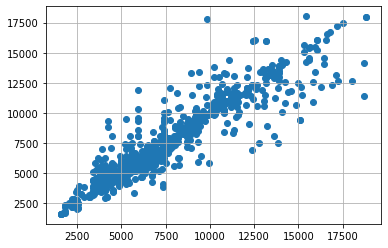

In [88]:
#Scatter plot
plt.scatter(x=y_test, y=y_pred_xgb)
plt.grid(True)

In [89]:
import joblib
joblib.dump(xgb,"Flight price prediction")

['Flight price prediction']

Extreme gradient boost regressor is giving best patterns for our data. I have finalised based on the test score and the RMSE value as it has the least Value compared to other models.

We have hit 85% of score with XGBoost Regressor.

### After Analysis

1. I have plotted hist plot and found that the prices of the flights are going high and low frequently, they are not fixed at a time.

2. Same from hist plot I found the prices are increasing in the large  amounts.

3. Early hour flight fares are less, as the time goes the flight Fares increases and midnight flight fares are less. 

4. By plotting cat plot I found that the prices are tending to go up as the time is approching.

5. By plotting catplot I found Early morning flights are cheaper compared to working hours.

6. By plotting catplot I got to know that, Almost Both indigo and spice jet airways having same fare.

7. Morning Fares are less compared to other timings flight fares.